# Student Performance Prediction Using Random Forest Classifier

This project aims to predict whether a student will pass or fail based on their demographic information and exam scores. Using the "Students Performance in Exams" dataset, we preprocess the data, engineer relevant features, and apply a Random Forest Classifier to classify students as passing or failing. The workflow includes data cleaning, exploratory data analysis, feature encoding, model training, evaluation, and visualization to provide insights into the factors influencing student performance.

## Importing the Dependencies

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

## Uploading the dataset

### About the Dataset

The "Students Performance in Exams" dataset contains information on 1,000 students, including their demographic characteristics and scores in three subjects: math, reading, and writing. The dataset is commonly used for educational data analysis and machine learning tasks such as classification and regression.

**Key Features:**
- **Demographic Attributes:** Includes gender, race/ethnicity, parental level of education, lunch type, and test preparation course completion.
- **Academic Scores:** Provides individual scores for math, reading, and writing.
- **Engineered Features:** In this project, an average score is calculated for each student, and a binary "pass" column is created to indicate whether a student passed (average score ≥ 50).

**Applications:**
- Predicting student performance (pass/fail)
- Analyzing the impact of demographic factors on academic achievement
- Identifying at-risk students for targeted interventions

This dataset is valuable for exploring relationships between student background and academic outcomes, and for building predictive models to support educational decision-making.

In [3]:
ds=pd.read_csv('StudentsPerformance.csv')
ds.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Exploratory Data Analysis

### Dimension Columns in the Dataset

In [4]:
ds.shape

(1000, 8)

### Dataset Information (`info()` method)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB



### Description of the Dataset


In [6]:
ds.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Data Preprocessing

### Filling the null values 

In [7]:
ds.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Creating Average and Pass columns based on students score

In [ ]:


ds['average'] = (ds['math score'] + ds['reading score'] + ds['writing score']) / 3
ds['pass'] = ds['average'].apply(lambda x: 1 if x >= 50 else 0)




## Encode Categorical Variables

In [11]:
le = LabelEncoder()
for col in ds.select_dtypes(include='object'):
    ds[col] = le.fit_transform(ds[col])

In [10]:
ds.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass
0,0,1,1,1,1,72,72,74,72.666667,1
1,0,2,4,1,0,69,90,88,82.333333,1
2,0,1,3,1,1,90,95,93,92.666667,1
3,1,0,0,0,1,47,57,44,49.333333,0
4,1,2,4,1,1,76,78,75,76.333333,1


## Dependent and Independent Variables



- **Dependent Variable (Target):**
    - The variable we want to predict is the `pass` column, which indicates whether a student passed (1) or failed (0) based on their average score.

- **Independent Variables (Features):**
    - `gender`
    - `race/ethnicity`
    - `parental level of education`
    - `lunch`
    - `test preparation course`
    - `math score`
    - `reading score`
    - `writing score`
    - `average`

These independent variables are used as input features to predict the dependent variable (`pass`).

## Define Features and Labels

In [12]:
x = ds.drop(['average', 'pass'], axis=1)
y = ds['pass']


In [13]:
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


In [14]:
y

0      1
1      1
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: pass, Length: 1000, dtype: int64

## Train-Test Split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


## Model Training


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)


## Model Prediction Results

The trained Random Forest model was used to predict the pass status for students in the test dataset (`x_test`). The predicted values (`y_pred`) represent whether each student is classified as passing (1) or not passing (0) based on their scores and other features. These predictions can be compared to the actual pass status values (`y_test`) to evaluate the model's performance and its ability to generalize to unseen data.


In [18]:
y_pred = model.predict(x_test)

In [19]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## Model Evaluation

This section evaluates the performance of the trained Decision Tree model for loan status prediction. By comparing the predicted and actual values on the test set, we assess the model’s accuracy, precision, recall, F1-score, and present the confusion matrix. These metrics provide insight into how effectively the model distinguishes between approved and rejected loan applications.

In [21]:
print("Accuracy:", model.score(x_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.995
[[ 26   1]
 [  0 173]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.99      1.00      1.00       173

    accuracy                           0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       1.00      0.99      0.99       200



## Sample Prediction

In [26]:
student = pd.DataFrame({
    'gender': [0],
    'race/ethnicity': [1],
    'parental level of education': [2],
    'lunch': [1],
    'test preparation course': [0],
    'math score': [50],
    'reading score': [45],
    'writing score': [32]
})
student_pred = model.predict(student)
print("Predicted Pass Status for New Student:", "Pass" if student_pred[0]==1 else "Fail")


Predicted Pass Status for New Student: Fail


## Data Visualization

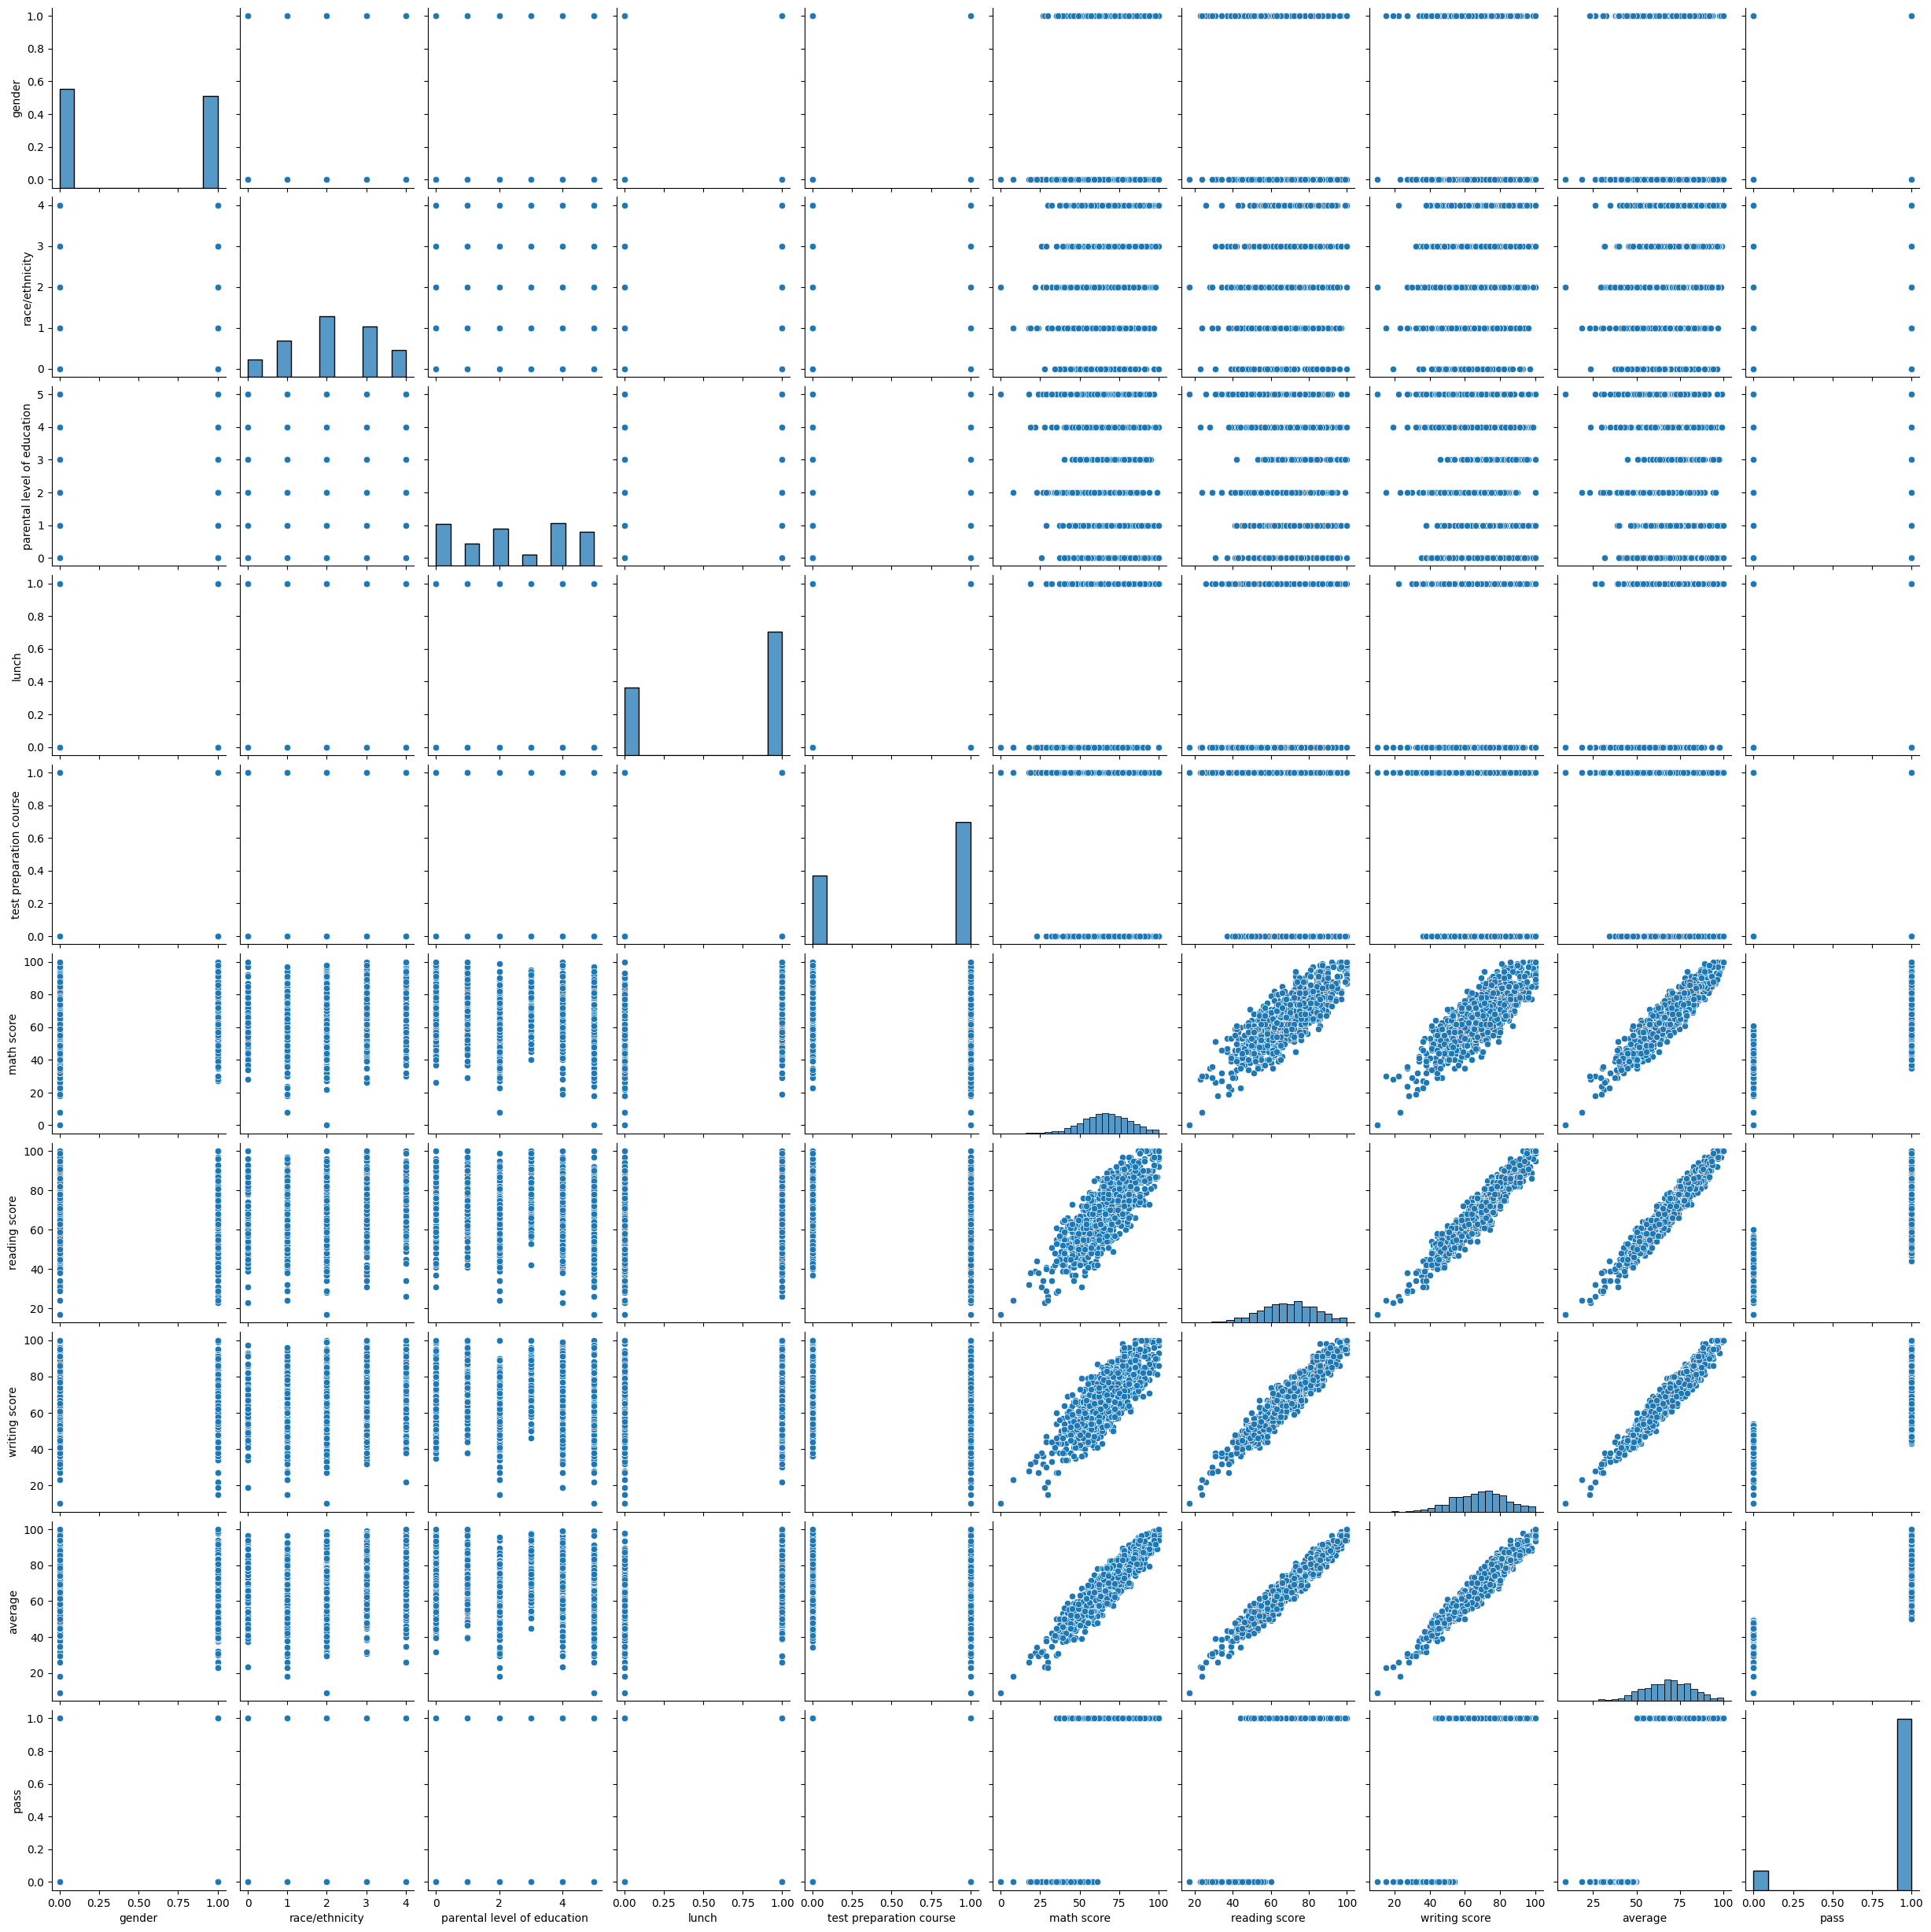

In [27]:
sns.pairplot(ds)
plt.show()

## Model Visualization


#### #1 Visualization

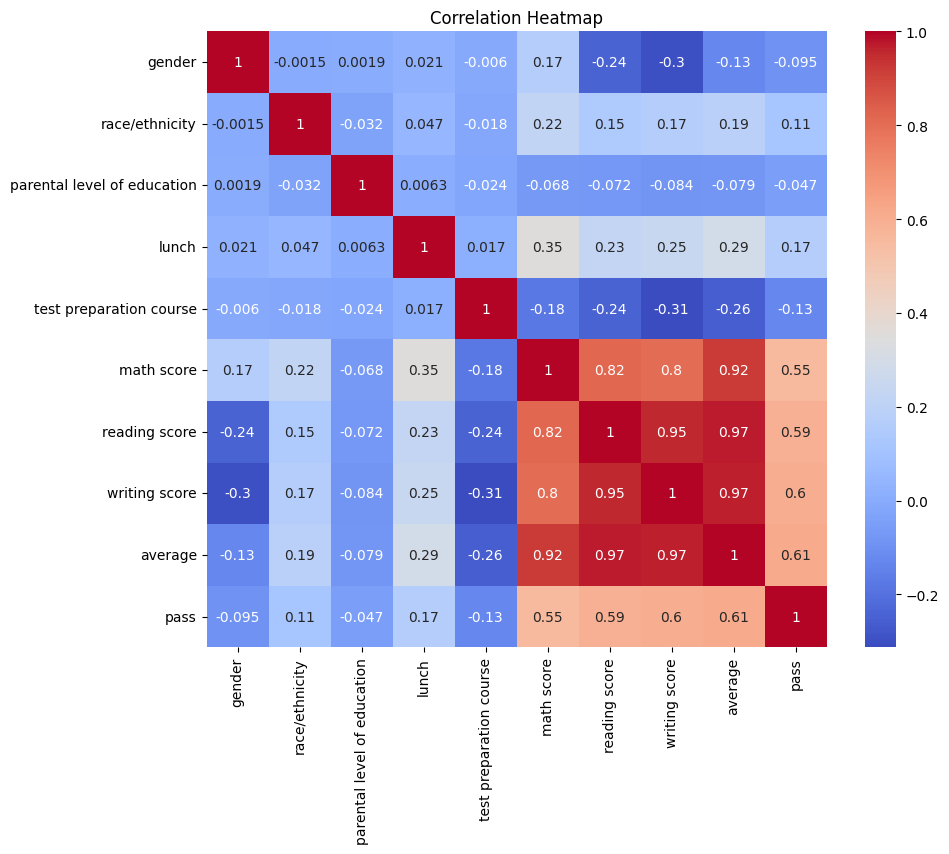

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(ds.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



#### #2 Visualization

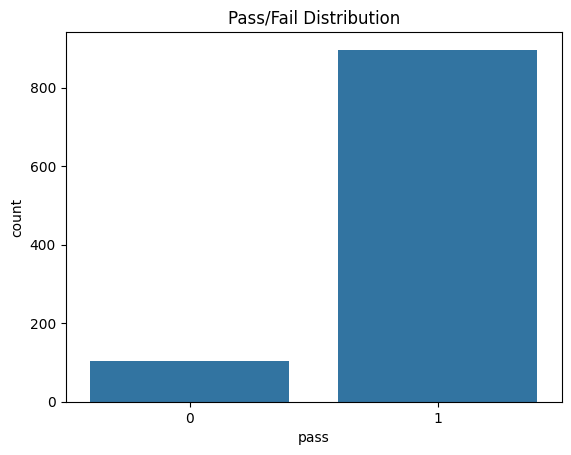

In [28]:
sns.countplot(x='pass', data=ds)
plt.title('Pass/Fail Distribution')
plt.show()


#### #3 Visualization

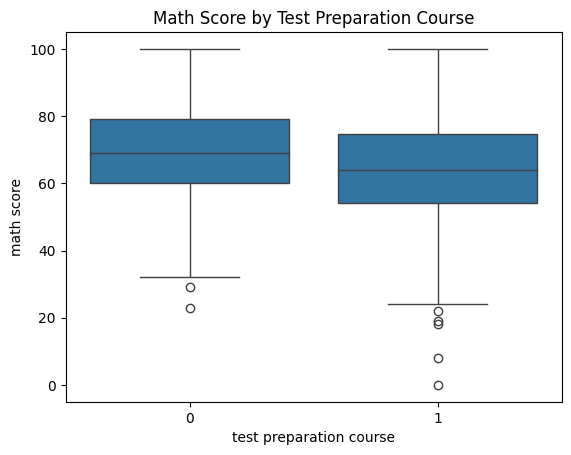

In [29]:
sns.boxplot(x='test preparation course', y='math score', data=ds)
plt.title('Math Score by Test Preparation Course')
plt.show()

## Conclusion

The Random Forest Classifier achieved a high accuracy in predicting student pass/fail status based on their scores and demographic features. This indicates that the model is effective in identifying students who are likely to pass or fail. The results suggest that the selected features and preprocessing steps were appropriate, and the model can be used for similar educational datasets to support data-driven decision-making.

### Assumptions Taken for This Project

- The dataset is clean and contains no missing or erroneous values after preprocessing.
- All categorical variables are properly encoded as numerical values for model training.
- The `pass` threshold is set at an average score of 50 or above.
- The features selected (demographic and score-related) are sufficient to predict student pass/fail status.
- The train-test split (80/20) provides a representative sample for model evaluation.
- The Random Forest Classifier is appropriate for this binary classification problem.
- The relationships between features and the target variable are adequately captured by the model.
- The data distribution in the training and test sets is similar, ensuring fair evaluation.
- The model does not account for external factors not present in the dataset (e.g., motivation, teaching quality).

### References


- [Students Performance in Exams Dataset (Kaggle)](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [NumPy Documentation](https://numpy.org/doc/)
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)
